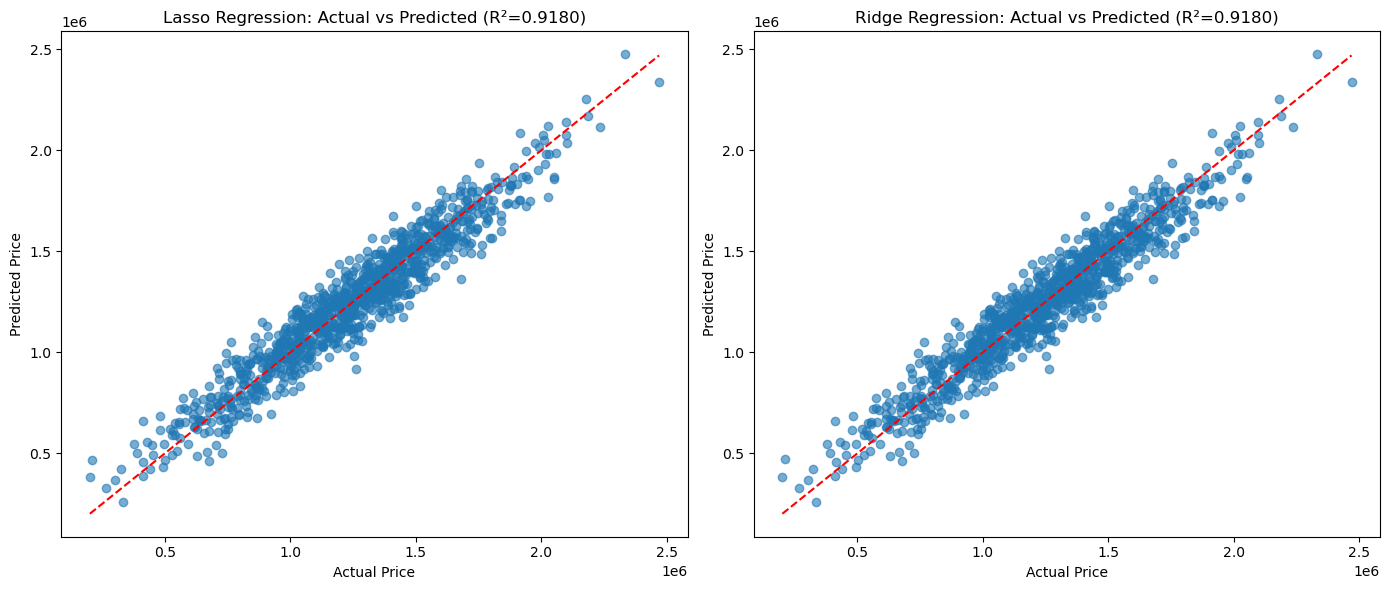

Best Lasso alpha: 29.7635 | R²: 0.9180
Best Ridge alpha: 2.6367 | R²: 0.9180


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('housing_price_dataset.csv')

# Prepare feature and target columns
feature_cols = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms',
    'Area Population'
]
target_col = 'Price'

X = df[feature_cols]
y = df[target_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 (Lasso) Regression with Grid Search
lasso = Lasso(max_iter=10000)
params_lasso = {'alpha': np.logspace(-3,2,20)}
gs_lasso = GridSearchCV(lasso, params_lasso, cv=5, scoring='r2')
gs_lasso.fit(X_train, y_train)
best_lasso = gs_lasso.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

# L2 (Ridge) Regression with Grid Search
ridge = Ridge(max_iter=10000)
params_ridge = {'alpha': np.logspace(-3,2,20)}
gs_ridge = GridSearchCV(ridge, params_ridge, cv=5, scoring='r2')
gs_ridge.fit(X_train, y_train)
best_ridge = gs_ridge.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Plot: Actual vs Predicted (Lasso & Ridge)
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Lasso Regression: Actual vs Predicted (R²={r2_lasso:.4f})')

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_ridge, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Ridge Regression: Actual vs Predicted (R²={r2_ridge:.4f})')

plt.tight_layout()
plt.show()

print(f'Best Lasso alpha: {gs_lasso.best_params_["alpha"]:.4f} | R²: {r2_lasso:.4f}')
print(f'Best Ridge alpha: {gs_ridge.best_params_["alpha"]:.4f} | R²: {r2_ridge:.4f}')
